# Hypothesis: The human brain uses different genes in different regions

## The data: Allen Brain Institute

## Load the data into `flotilla` via `embark`

In [1]:
%matplotlib inline

import flotilla
study = flotilla.embark(flotilla._brainspan)

2015-05-07 17:49:14	Parsing datapackage to create a Study object
2015-05-07 17:49:19	Initializing Study
2015-05-07 17:49:19	Initializing Predictor configuration manager for Study
2015-05-07 17:49:19	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2015-05-07 17:49:19	Added ExtraTreesClassifier to default predictors
2015-05-07 17:49:19	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2015-05-07 17:49:19	Added ExtraTreesRegressor to default predictors
2015-05-07 17:49:19	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2015-05-07 17:49:19	Added GradientBoostingClassifier to default predictors
2015-05-07 17:49:19	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
2015-05-07 17:49:19	Added GradientBoostingRegressor to default predictors
2015-05-07 17:49:19	Loadi

:0: FutureWarning: IPython widgets are experimental and may change in the future.


### A look behind the magic

`flotilla._brainspan` is a link to a JSON file:

In [2]:
flotilla._brainspan

'https://s3-us-west-2.amazonaws.com/flotilla/brainspan_batch_corrected_for_amazon_s3/datapackage.json'

This json follows the [datapackage](http://data.okfn.org/doc/data-package) specification as outlined by the Open Knowledge foundation.

In [3]:
! curl https://s3-us-west-2.amazonaws.com/flotilla/brainspan_batch_corrected_for_amazon_s3/datapackage.json

{
  "name": "brainspan_filtered_and_markers_amazon", 
  "title": null, 
  "datapackage_version": "0.1.5", 
  "sources": null, 
  "licenses": null, 
  "resources": [
    {
      "name": "expression_feature", 
      "format": "csv", 
      "rename_col": "gene_symbol", 
      "ignore_subset_cols": [
        "gene_id", 
        "gene_symbol", 
        "entrez_id"
      ], 
      "url": "https://s3-us-west-2.amazonaws.com/flotilla/brainspan_batch_corrected_for_amazon_s3/expression_feature.csv"
    }, 
    {
      "name": "expression", 
      "log_base": 2, 
      "format": "csv", 
      "thresh": -Infinity, 
      "plus_one": true, 
      "path": "https://s3-us-west-2.amazonaws.com/flotilla/brainspan_batch_corrected_for_amazon_s3/expression.csv"
    }, 
    {
      "pooled_col": "pooled", 
      "name": "metadata", 
      "phenotype_to_marker": {
        "M1C": "^", 
        "DTH": "D", 
        "A1C": "o", 
        "TCx": "s", 
        "VFC": "v", 
        "Ocx": "o", 
        "V1C": "s", 

2.) A string that is a name of a folder in `"~/flotilla_projects"`. If you use this study here, change something, and want to keep it around for later, you can use `study.save('project_name')` and then embark on it later with `flotilla.embark('project_name')`.


### Model-Compute-View-Controller

Modified image of MVC

labeled:
* Model = pandas
* Compute = scikit-learn
* View = matplotlib, seaborn
* controller = IPython notebook + widgets

## Back to the hypothesis: The human brain has different genes expressed in different regions



To address the question of how the expression varies across regions, we will Principal component analysis.


### Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction algorithm which transforms a high-dimensional space like gene expression, to smaller dimensions, like just two for x- y- plotting.

![](http://www.nlpca.org/fig_pca_principal_component_analysis.png)

/Users/olga/anaconda/lib/python2.7/site-packages/pandas/core/index.py:705: FutureWarning: slice indexers when using iloc should be integers and not floating point
  "and not floating point",FutureWarning)
/Users/olga/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


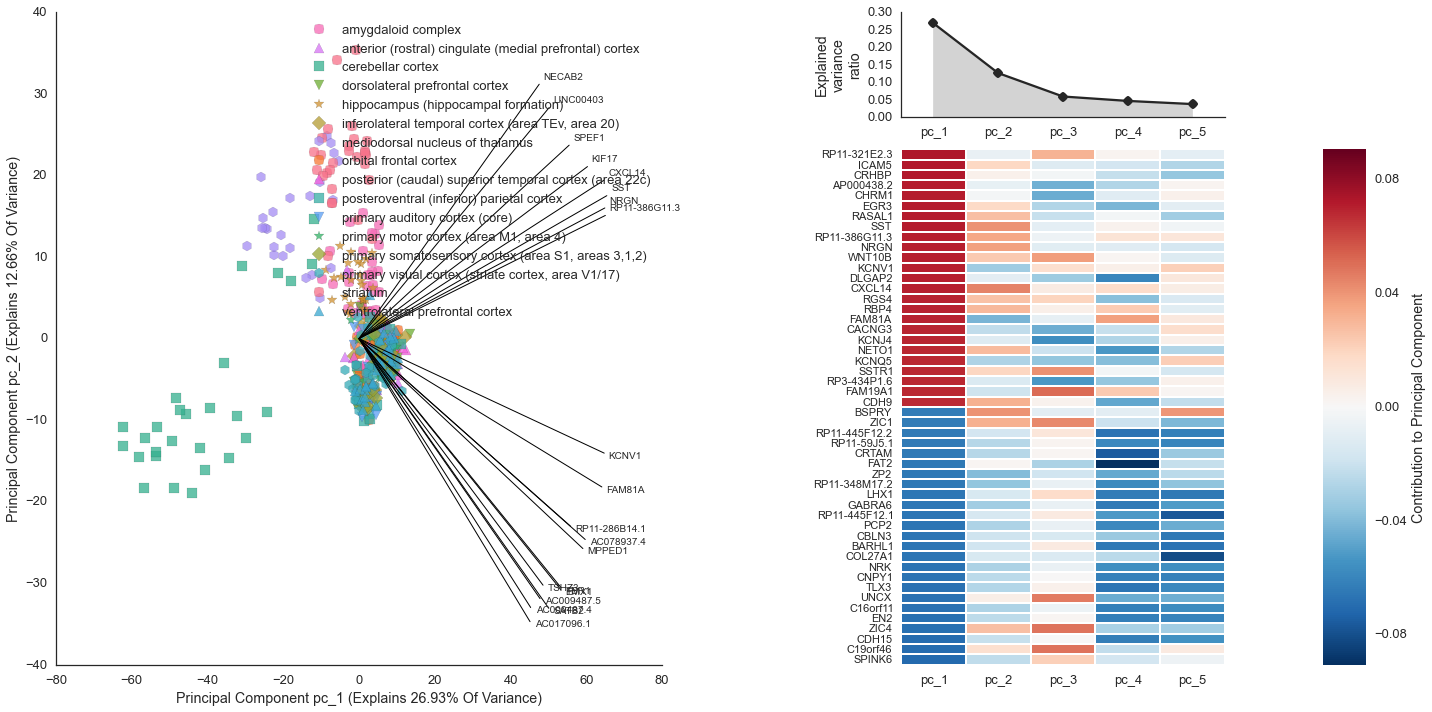

In [5]:
pcaviz = study.plot_pca(color_samples_by='structure_name')
pcaviz.fig_reduced.savefig('brainspan_pca.pdf')

Hmm, all those non-cerebellar cortex, non-striatum samples are really stacked on top of each other. What if we want to pull out genes that are associated with a particular structure, like the hippocampus?

In [ ]:
# # Cerebellum markers from http://www.nature.com/nrn/journal/v16/n2/fig_tab/nrn3886_F3.html

cerebellar_markers = ['ALDOC', 'PLCB3', 'SLC1A6', 'GABBR2', 'NCS1', 'PLCB4', 'GRM1', 'MAP1A', 'NPTN', 'NRGN']
for gene in cerebellar_markers:
    study.plot_gene(gene)

## Hypothesis: Cells in the hippocampus use genes unique to its function

The hippocampus is involved in memory, and we hypothesize that these cells have a unique molecular profile (set of genes that are expresssed). To accomplish this, we will use a classifier on our data to identify genes which separate hippocampal samples from non-hippocampal samples.

By default, `flotilla` uses an "Extremely Randomised Trees" Classifier (`ExtraTreesClassifier`), which takes random subsets of the data many times to create decision trees, like this one for deciding whether to play outside:

![](http://thespread.us/images/Decision_tree_model.png)

score_coefficient : 2.0
predictor_type : ExtraTreesClassifier
data_type : expression
show_point_labels : False
sample_subset : all_samples
feature_subset : all features
plot_violins : False
categorical_variable : structure_acronym: HIP
2015-04-10 21:53:20 Configuring predictor type: ExtraTreesClassifier with 14321 features

[Parallel(n_jobs=4)]: Done   1 out of 209 | elapsed:    0.0s remaining:    4.0s
[Parallel(n_jobs=4)]: Done 717 out of 717 | elapsed:    2.4s finished


Fitting a predictor for X:all_samples_all features, y:structure_acronym: HIP, method:ExtraTreesClassifier... please wait.
	Finished.


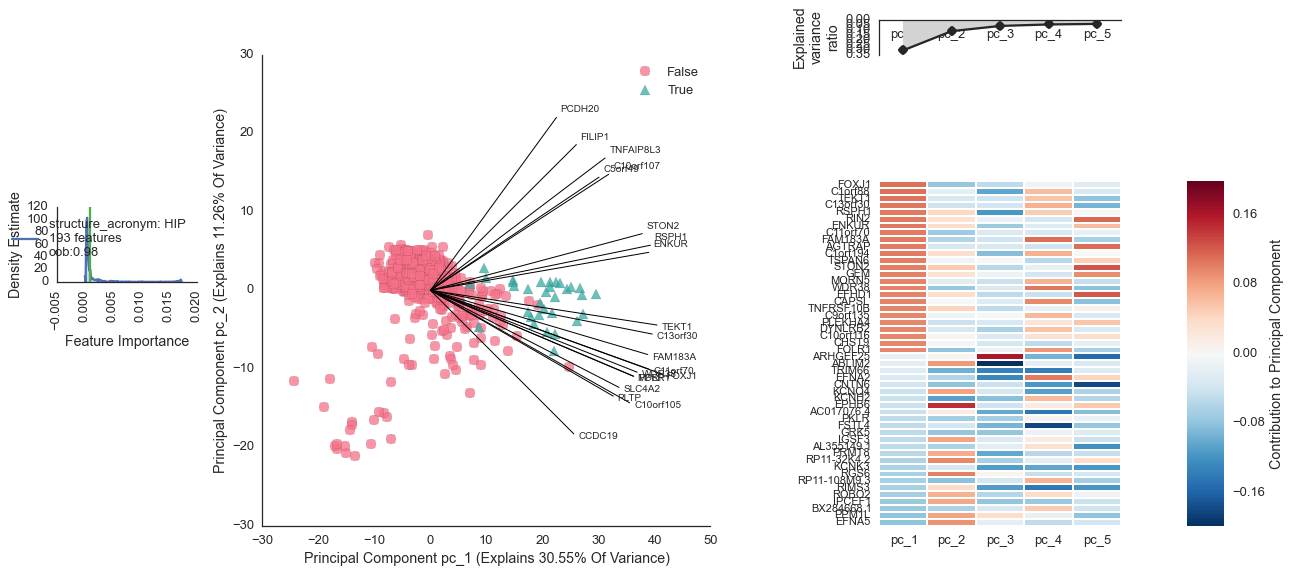

In [5]:
study.plot_classifier('structure_acronym: HIP', feature_subset='all features')

* Choose trait as "structure_acronym: HIP"
* Choose features as "all features"

## Cilia are important for memory development